In [1]:
import sys; sys.path.insert(0,'..')
from cadence.imports import *
from cadence.parsers.rhythm import *
import networkx as nx


In [2]:
t = Verse("""
When most I wink, then do mine eyes best see,
But when I sleep, in dreams they look on thee,
And darkly bright are bright in dark directed.
Then thou, whose shadow shadows doth make bright,
How would thy shadow's form form happy show
To the clear day with thy much clearer light,
When to unseeing eyes thy shade shines so!
How would, I say, mine eyes be blessed made
By looking on thee in the living day,
When in dead night thy fair imperfect shade
Through heavy sleep on sightless eyes doth stay!
All days are nights to see till I see thee,
And nights bright days when dreams do show thee me.
""")

In [3]:
constraints = [
    'w_peak',
    'unres_across',
    'unres_within',
    'w_stressed',
    's_unstressed',
]

In [4]:
# dfparses = pd.concat(t.parse())
# dfparses

In [5]:
def get_node(slot_i, slot_meter, syll_str):
    return f'{slot_i:02} ({slot_meter}) {syll_str.upper() if slot_meter=="s" else syll_str.lower()}'


def plot_parse_ambiguity(df, fn='graph.png'):
    for unit,udf in df.groupby('unit_i'):
        G = nx.DiGraph()

        for parse_rank,parse_df in udf.groupby('parse_rank'):
            pdf=parse_df.reset_index().fillna('-')
            pdf=pdf[pdf.slot_meter.isin({'s','w'})]

            last_xnodes = []
            sloti=0
            for i,row in pdf.iterrows():
                sloti+=1
                this_xnodes = []
                for x in ['s','w']:
                    xnode = get_node(sloti, x, row.syll_str)
                    if not G.has_node(xnode): G.add_node(xnode)
                    this_xnodes.append(xnode)

                    for ynode in last_xnodes:
                        if not G.has_edge(ynode, xnode):
                            G.add_edge(ynode, xnode, style='invis', penwidth=0)
                last_xnodes = this_xnodes

            last_node = None
            sloti=0
            for i,row in pdf.iterrows():
                sloti+=1
                node = get_node(sloti, row.slot_meter, row.syll_str)
                if last_node:
                    # G.add_edge(last_node, node)
                    G.edges[last_node,node]['style']='solid'
                    if G.edges[last_node,node]['penwidth']<5:
                        G.edges[last_node,node]['penwidth']+=1
                last_node = node
        
        break

    pyd=nx.nx_pydot.to_pydot(G)
    pyd.set_rankdir('LR')

    for node in pyd.get_node_list():
        node.set_orientation('portrait')
    pyd.write_png(fn)

    from IPython.display import Image
    display(Image(filename=fn))
    
    

parsing constraints=['unres_across', 'unres_within', 'w_peak']
num_proc 1


Metrically parsing line units:   0%|          | 0/1 [00:00<?, ?it/s]

 <b>Pluck</b> <u>the</u> <b>keen</b> <u><b>teeth</b></u> from <u>the</u> <b>fierce</b> <u><b>ti</b></u>ger's <u><b>jaws</b></u>

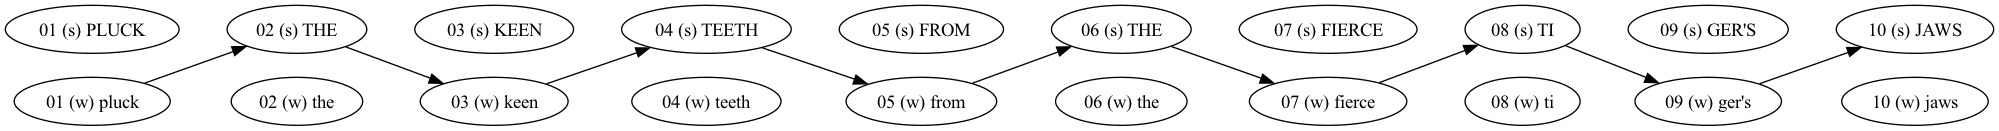

parsing constraints=['unres_across', 'unres_within', 'w_peak']
num_proc 1


Metrically parsing line units:   0%|          | 0/1 [00:00<?, ?it/s]

 <b>Pluck</b> <u>im</u><font style="color:darkred"><b>mense</b></font> <u><b>teeth</b></u> from <u>the</u> <b>fierce</b> <u><b>ti</b></u>ger's <u><b>jaws</b></u>

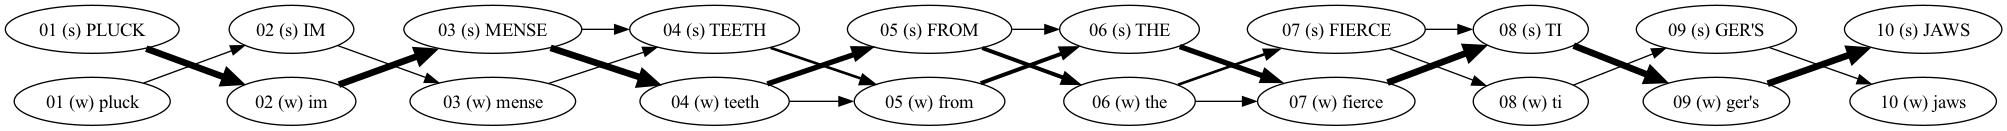

In [12]:
# plot_parse_ambiguity(Verse('To the clear day with thy much clearer light').parse())
# plot_parse_ambiguity(Verse('When most I wink, then do mine eyes best see,').parse())
# plot_parse_ambiguity(Verse('From fairest creatures we desire increase').parse())
# plot_parse_ambiguity(Verse("Of man's first disobedience, and the fruit").parse())
plot_parse_ambiguity(Verse("Pluck the keen teeth from the fierce tiger's jaws").parse())
plot_parse_ambiguity(Verse("Pluck immense teeth from the fierce tiger's jaws").parse())
# x='To me thy strong aspiring hopes'


# plot_parse_ambiguity(Verse(x).parse())

parsing constraints=['unres_across', 'unres_within', 'w_peak']
num_proc 1


Metrically parsing line units:   0%|          | 0/1 [00:00<?, ?it/s]

 I am <u><b>mo</b></u><b>narch</b> <u>of</u> all I <u><b>sur</b></u><b>vey</b>

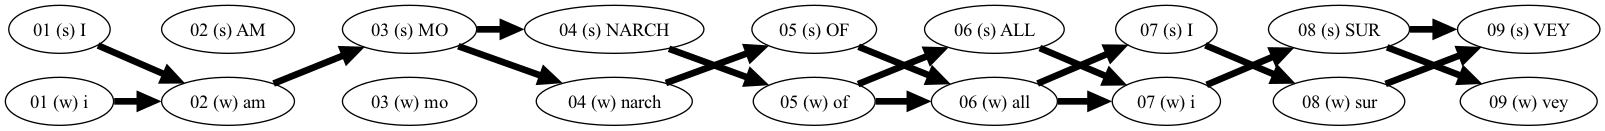

In [18]:
plot_parse_ambiguity(Verse("I am monarch of all I survey").parse())

parsing constraints=['s_unstressed', 'unres_across', 'unres_within', 'w_peak', 'w_stressed']
num_proc 1


Metrically parsing line units:   0%|          | 0/1 [00:00<?, ?it/s]

 <u><b>co</b></u>lor<font style="color:darkred">less</font> <u><b>green</b></u> i<u><b>de</b></u>as <u><b>sleep</b></u> <font style="color:darkred"><u><b>fu</b></u></font>rio<font style="color:darkred"><u>u</u></font>sly

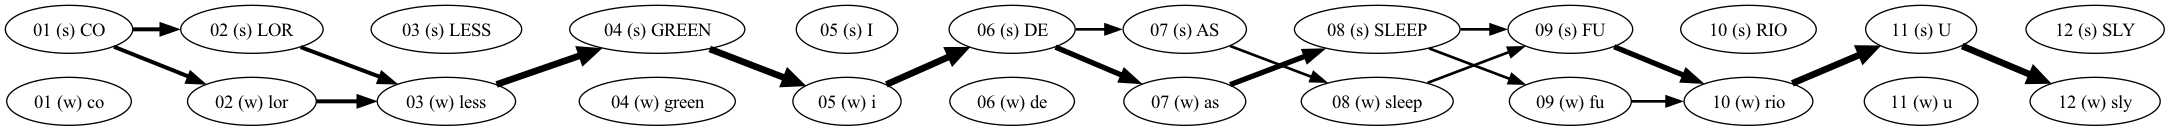

In [16]:
plot_parse_ambiguity(Verse("colorless green ideas sleep furiously").parse(constraints = DEFAULT_CONSTRAINTS + ['s_unstressed', 'w_stressed']))

In [7]:
# # para.parse()
# dfparses = t.parse(constraints=constraints)[0]
# dfparses.reset_index().parse_i.value_counts()

In [10]:
Verse("Pluck the keen teeth from the fierce tiger's jaws").parse()

parsing constraints=['unres_across', 'unres_within', 'w_peak']
num_proc 1


Metrically parsing line units:   0%|          | 0/1 [00:00<?, ?it/s]

 <b>Pluck</b> <u>the</u> <b>keen</b> <u><b>teeth</b></u> from <u>the</u> <b>fierce</b> <u><b>ti</b></u>ger's <u><b>jaws</b></u>

*total  ...  num_parses
unit_i parse_rank is_troch parse_i parse      parse_str                                         sent_i sentpart_i line_i combo_i slot_i slot_meter syll_str_parse word_i word_str word_tok word_ipa_i word_ipa  syll_i syll_str syll_ipa syll_stress syll_weight          ...            
1      1          0        1       wSwSwSwSwS 𝖯𝗅𝗎𝖼𝗄 𝘁𝗵𝗲 𝗄𝖾𝖾𝗇 𝘁𝗲𝗲𝘁𝗵 𝖿𝗋𝗈𝗆 𝘁𝗵𝗲 𝖿𝗂𝖾𝗋𝖼𝖾 𝘁𝗶𝗀𝖾𝗋'𝗌 𝗷𝗮𝘄𝘀 1      1          1      1       1      w          𝖯𝗅𝗎𝖼𝗄          1      Pluck    pluck    1          'plʌk     1      Pluck    'plʌk    P           H               0.0  ...           1
                                                                                                                                 2      s          𝘁𝗵𝗲            2       the     the      1          ðə        1      the      ðə       U           L               0.0  ...           1
                                                                                                                                 3      w          𝗄𝖾𝖾𝗇           3       keen    keen     1          'kiːn     1      keen     'kiːn    P           H               0.0  ...           1
                                                                                                                                 4      s          𝘁𝗲𝗲𝘁𝗵          4       teeth   teeth    1          'tiːθ     1      teeth    'tiːθ    P           H               0.0  ...           1
                                                                                                                                 5      w          𝖿𝗋𝗈𝗆           5       from    from     1          frʌm      1      from     frʌm     U           H               0.0  ...           1
                                                                                                                                 6      s          𝘁𝗵𝗲            6       the     the      1          ðə        1      the      ðə       U           L               0.0  ...           1
                                                                                                                                 7      w          𝖿𝗂𝖾𝗋𝖼𝖾         7       fierce  fierce   1          'fɪrs     1      fierce   'fɪrs    P           H               0.0  ...           1
                                                                                                                                 8      s          𝘁𝗶             8       tiger's tigers   1          'taɪ.gɛːz 1      ti       'taɪ     P           H               0.0  ...           1
                                                                                                                                 9      w          𝗀𝖾𝗋'𝗌          8       tiger's tigers   1          'taɪ.gɛːz 2      ger's    gɛːz     U           H               0.0  ...           1
                                                                                                                                 10     s          𝗷𝗮𝘄𝘀           9       jaws    jaws     1          'ʤɔːz     1      jaws     'ʤɔːz    P           H               0.0  ...           1

[10 rows x 5 columns]